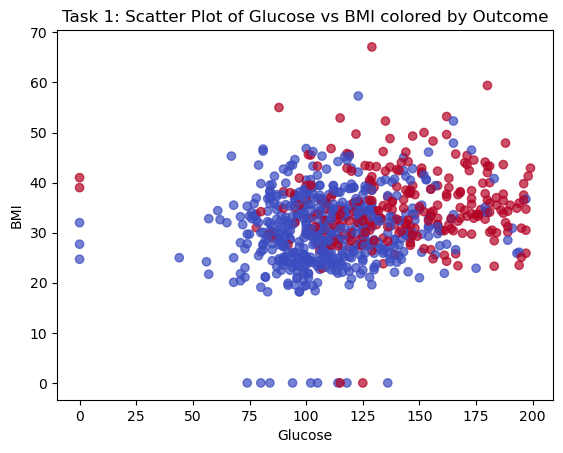

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


data = pd.read_csv("diabetes.csv")

# 1Visualize the data (scatter plot);
plt.scatter(data['Glucose'], data['BMI'], c=data['Outcome'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Task 1: Scatter Plot of Glucose vs BMI colored by Outcome')
plt.show()

# 2Split the dataset into train and test in proportion of 80% to 20%;
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [23]:

# 3.Train a Random Forest model. Use 5-fold cross-validation method to find the best value for a max_depth hyperparameter;
max_depth_values = range(1, 11)
rf_scores = []

for depth in max_depth_values:
    rf_clf = RandomForestClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')
    rf_scores.append(scores.mean())

best_rf_depth = max_depth_values[np.argmax(rf_scores)]
print("Random Forest:")
print("Best max_depth value:", best_rf_depth)
print("Mean accuracy scores for different max_depth values:", rf_scores)


Random Forest:
Best max_depth value: 8
Mean accuracy scores for different max_depth values: [0.6986805277888843, 0.742702918832467, 0.7508463281354125, 0.7606424097027855, 0.7687458349993337, 0.7557643609222977, 0.7752499000399841, 0.7785285885645742, 0.757350393176063, 0.7703985072637611]


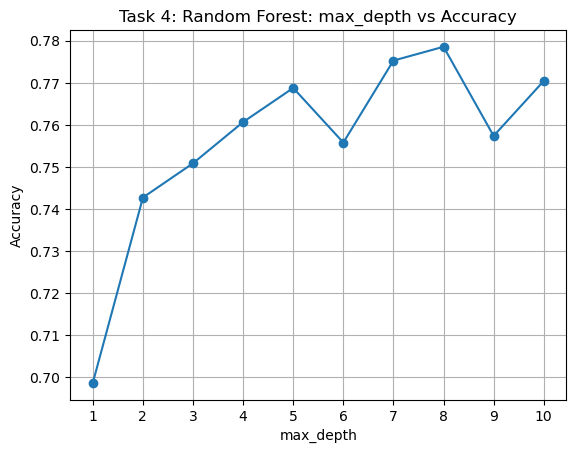

In [24]:
# 4.Plot the max_depth hyperparameter values with Accuracy scores;
plt.plot(max_depth_values, rf_scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Task 4: Random Forest: max_depth vs Accuracy')
plt.xticks(max_depth_values)
plt.grid(True)
plt.show()



In [25]:
# 5.Train a XGBoost model. Use 5-fold cross-validation method to find the best value for amax_depth hyperparameter;
xgb_scores = []

for depth in max_depth_values:
    xgb_clf = XGBClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='accuracy')
    xgb_scores.append(scores.mean())

best_xgb_depth = max_depth_values[np.argmax(xgb_scores)]

print("Random Forest:")
print("Best max_depth value:", best_rf_depth)
print("Mean accuracy scores for different max_depth values:", rf_scores)

print("\nXGBoost:")
print("Best max_depth value:", best_xgb_depth)
print("Mean accuracy scores for different max_depth values:", xgb_scores)

Random Forest:
Best max_depth value: 8
Mean accuracy scores for different max_depth values: [0.6986805277888843, 0.742702918832467, 0.7508463281354125, 0.7606424097027855, 0.7687458349993337, 0.7557643609222977, 0.7752499000399841, 0.7785285885645742, 0.757350393176063, 0.7703985072637611]

XGBoost:
Best max_depth value: 2
Mean accuracy scores for different max_depth values: [0.7671331467413035, 0.7703718512594963, 0.7638411302145808, 0.7540717046514727, 0.7557110489137678, 0.7329201652672264, 0.7524456883913102, 0.7442756230840997, 0.7426629348260696, 0.7491669998667201]


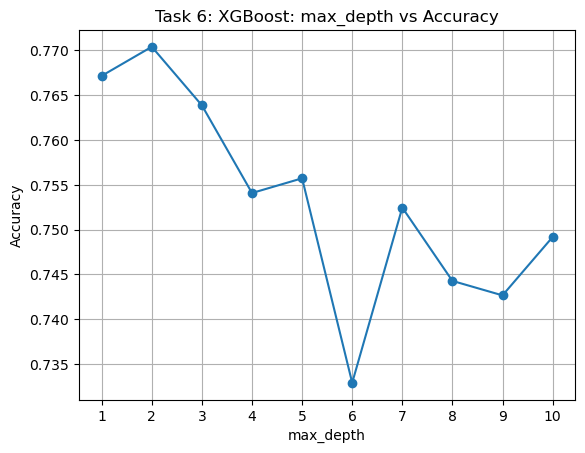

In [26]:
# 6.Plot the max_depth hyperparameter values with Accuracy scores;
plt.plot(max_depth_values, xgb_scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Task 6: XGBoost: max_depth vs Accuracy')
plt.xticks(max_depth_values)
plt.grid(True)
plt.show()



In [27]:
# 7.Predict on the test data;
rf_clf = RandomForestClassifier(max_depth=best_rf_depth, random_state=42)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)

xgb_clf = XGBClassifier(max_depth=best_xgb_depth, random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_y_pred = xgb_clf.predict(X_test)

print("Random Forest Predictions:", rf_y_pred)
print("XGBoost Predictions:", xgb_y_pred)


Random Forest Predictions: [0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]
XGBoost Predictions: [1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0]


In [28]:
# 8.Evaluate the model (Accuracy, Precision, Recall);
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return accuracy, precision, recall

rf_accuracy, rf_precision, rf_recall = evaluate_model(y_test, rf_y_pred)
xgb_accuracy, xgb_precision, xgb_recall = evaluate_model(y_test, xgb_y_pred)

print("Random Forest Evaluation:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)

print("\nXGBoost Evaluation:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)

Random Forest Evaluation:
Accuracy: 0.7467532467532467
Precision: 0.6481481481481481
Recall: 0.6363636363636364

XGBoost Evaluation:
Accuracy: 0.7337662337662337
Precision: 0.6166666666666667
Recall: 0.6727272727272727


In [33]:
# 9.Compare all models and explain your results.
print('task 9')
print("Random Forest - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}".format(rf_accuracy, rf_precision, rf_recall))
print("XGBoost - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}".format(xgb_accuracy, xgb_precision, xgb_recall))
print("According to results Random forest is effective than XGBoost, it more accurate, more precise and faster, because it not really huge dataset and only one feature was choosen, for this reasons random forest  is better in this case.")

task 9
Random Forest - Accuracy: 0.7468, Precision: 0.6481, Recall: 0.6364
XGBoost - Accuracy: 0.7338, Precision: 0.6167, Recall: 0.6727
According to results Random forest is effective than XGBoost, it more accurate, more precise and faster, because it not really huge dataset and only one feature was choosen, for this reasons random forest  is better in this case.
